# MSDS 7331 Data Mining: Project1
Team: Andrew Abbott, Patrick McDevitt, Preeti Swaminathan, Vivek Bejugama    


## Online News Popularity Data Set

We are using online news popularity dataset from USI machine learning repository. The dataset is a collection of 61 attributes of about 39,797 articles published by Mashable (www.mashable.com) and not the article itself. The data was collected on January 8, 2015

We intend to mine this data to understand what parameter influence an article to be shared more than others. What kind of associations different attributes have for some article to be more popular than others. 

The data is located at https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity

Attribute Information:

     0. url:                           URL of the article
     1. timedelta:                     Days between the article publication and the dataset acquisition
     2. n_tokens_title:                Number of words in the title
     3. n_tokens_content:              Number of words in the content
     4. n_unique_tokens:               Rate of unique words in the content
     5. n_non_stop_words:              Rate of non-stop words in the content
     6. n_non_stop_unique_tokens:      Rate of unique non-stop words in the content
     7. num_hrefs:                     Number of links
     8. num_self_hrefs:                Number of links to other articles published by Mashable
     9. num_imgs:                      Number of images
    10. num_videos:                    Number of videos
    11. average_token_length:          Average length of the words in the content
    12. num_keywords:                  Number of keywords in the metadata
    13. data_channel_is_lifestyle:     Is data channel 'Lifestyle'?
    14. data_channel_is_entertainment: Is data channel 'Entertainment'?
    15. data_channel_is_bus:           Is data channel 'Business'?
    16. data_channel_is_socmed:        Is data channel 'Social Media'?
    17. data_channel_is_tech:          Is data channel 'Tech'?
    18. data_channel_is_world:         Is data channel 'World'?
    19. kw_min_min:                    Worst keyword (min. shares)
    20. kw_max_min:                    Worst keyword (max. shares)
    21. kw_avg_min:                    Worst keyword (avg. shares)
    22. kw_min_max:                    Best keyword (min. shares)
    23. kw_max_max:                    Best keyword (max. shares)
    24. kw_avg_max:                    Best keyword (avg. shares)
    25. kw_min_avg:                    Avg. keyword (min. shares)
    26. kw_max_avg:                    Avg. keyword (max. shares)
    27. kw_avg_avg:                    Avg. keyword (avg. shares)
    28. self_reference_min_shares:     Min. shares of referenced articles in Mashable
    29. self_reference_max_shares:     Max. shares of referenced articles in Mashable
    30. self_reference_avg_sharess:    Avg. shares of referenced articles in Mashable
    31. weekday_is_monday:             Was the article published on a Monday?
    32. weekday_is_tuesday:            Was the article published on a Tuesday?
    33. weekday_is_wednesday:          Was the article published on a Wednesday?
    34. weekday_is_thursday:           Was the article published on a Thursday?
    35. weekday_is_friday:             Was the article published on a Friday?
    36. weekday_is_saturday:           Was the article published on a Saturday?
    37. weekday_is_sunday:             Was the article published on a Sunday?
    38. is_weekend:                    Was the article published on the weekend?
    39. LDA_00:                        Closeness to LDA topic 0
    40. LDA_01:                        Closeness to LDA topic 1
    41. LDA_02:                        Closeness to LDA topic 2
    42. LDA_03:                        Closeness to LDA topic 3
    43. LDA_04:                        Closeness to LDA topic 4
    44. global_subjectivity:           Text subjectivity
    45. global_sentiment_polarity:     Text sentiment polarity
    46. global_rate_positive_words:    Rate of positive words in the content
    47. global_rate_negative_words:    Rate of negative words in the content
    48. rate_positive_words:           Rate of positive words among non-neutral tokens
    49. rate_negative_words:           Rate of negative words among non-neutral tokens
    50. avg_positive_polarity:         Avg. polarity of positive words
    51. min_positive_polarity:         Min. polarity of positive words
    52. max_positive_polarity:         Max. polarity of positive words
    53. avg_negative_polarity:         Avg. polarity of negative  words
    54. min_negative_polarity:         Min. polarity of negative  words
    55. max_negative_polarity:         Max. polarity of negative  words
    56. title_subjectivity:            Title subjectivity
    57. title_sentiment_polarity:      Title polarity
    58. abs_title_subjectivity:        Absolute subjectivity level
    59. abs_title_sentiment_polarity:  Absolute polarity level
    60. shares:                        Number of shares (target)

In [1]:
#importing Required Packages
import pandas as pd
import numpy as np

#Import Data from .csv file
df = pd.read_csv('/Users/vycki/Documents/Data/OnlineNewsPopularity.csv')  

# Strip leading spaces and store all the column names to a list
df.columns = df.columns.str.strip()
#col_names = df.columns.values.tolist()

# Extract useable elemnts from the string URL
df['http'], df['blank'], df['mash'], df['year'], df['month'], df['day'], df['title'], df['extra'] = df['url'].str.split('\/', 7).str

del df['http'],df['blank'],df['mash'],df['extra']

# Derive date column from year-month-day fields
df['year']  = (df['year']).astype(str)
df['month'] = (df['month']).astype(str)
df['day']   = (df['day']).astype(str)
df['publish_date'] = pd.to_datetime(df.year + df.month + df.day, format = "%Y%m%d")


In [2]:
# Summary of attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 66 columns):
url                              39644 non-null object
timedelta                        39644 non-null float64
n_tokens_title                   39644 non-null float64
n_tokens_content                 39644 non-null float64
n_unique_tokens                  39644 non-null float64
n_non_stop_words                 39644 non-null float64
n_non_stop_unique_tokens         39644 non-null float64
num_hrefs                        39644 non-null float64
num_self_hrefs                   39644 non-null float64
num_imgs                         39644 non-null float64
num_videos                       39644 non-null float64
average_token_length             39644 non-null float64
num_keywords                     39644 non-null float64
data_channel_is_lifestyle        39644 non-null float64
data_channel_is_entertainment    39644 non-null float64
data_channel_is_bus              39644 non-null floa

All the variables here are of data type float64. We can convert most of them to integers and boolean
Also there are no missing values in any of the atributes, thus null-handling is not required. 

There are boolean variables like is_monday, is_tuesday like wise, which can be mearged to create a single categorical variable.

Likewise data channel variables can also be mearged to one single categorical variable

Generate binomial popularity variable based on number of shares with 1400 shares are threshold to decide if an article is popular or not which can be used in further datamining. 


In [35]:
# Converting the data type to Integer
to_int = ['timedelta','n_tokens_title', 'n_tokens_content','num_keywords',
          'num_hrefs','num_self_hrefs', 'num_imgs', 'num_videos','shares' ]
df[to_int] = df[to_int ].astype(np.int64)

# Creating day_of_week Categorical variables 
df['day_of_week'] = 'Mon'

tuesday = df['weekday_is_tuesday'] == 1
df.loc[tuesday, 'day_of_week'] = 'Tue'

wednesday = df['weekday_is_wednesday'] == 1
df.loc[wednesday, 'day_of_week'] = 'Wed'

thursday = df['weekday_is_thursday'] == 1
df.loc[thursday, 'day_of_week'] = 'Thu'

friday = df['weekday_is_friday'] == 1
df.loc[friday, 'day_of_week'] = 'Fri'

saturday = df['weekday_is_saturday'] == 1
df.loc[saturday, 'day_of_week'] = 'Sat'

sunday = df['weekday_is_sunday'] == 1
df.loc[sunday, 'day_of_week'] = 'Sun'

# Creating day_of_week Categorical variables 
df['data_channel'] = np.NaN

condition = df['data_channel_is_lifestyle'] == 1
df.loc[condition, 'data_channel'] = 'Lifestyle'

condition = df['data_channel_is_entertainment'] == 1
df.loc[condition, 'data_channel'] = 'Entertainment'

condition = df['data_channel_is_bus'] == 1
df.loc[condition, 'data_channel'] = 'Business'

condition = df['data_channel_is_socmed'] == 1
df.loc[condition, 'data_channel'] = 'SocMed'

condition = df['data_channel_is_tech'] == 1
df.loc[condition, 'data_channel'] = 'Tech'

condition = df['data_channel_is_world'] == 1
df.loc[condition, 'data_channel'] = 'World'

# Popularity Variable . Article is considerd popular if it has more than 1400 shares. 
df['popularity'] = False

pop = df['shares'] > 1400
df.loc[pop, 'popularity'] = True


In [4]:
# Check for duplicates
df[df.duplicated()]

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,abs_title_sentiment_polarity,shares,year,month,day,title,publish_date,day_of_week,data_channel,popularity


No duplicate rows in the data.

In [5]:
list(df)

['url',
 'timedelta',
 'n_tokens_title',
 'n_tokens_content',
 'n_unique_tokens',
 'n_non_stop_words',
 'n_non_stop_unique_tokens',
 'num_hrefs',
 'num_self_hrefs',
 'num_imgs',
 'num_videos',
 'average_token_length',
 'num_keywords',
 'data_channel_is_lifestyle',
 'data_channel_is_entertainment',
 'data_channel_is_bus',
 'data_channel_is_socmed',
 'data_channel_is_tech',
 'data_channel_is_world',
 'kw_min_min',
 'kw_max_min',
 'kw_avg_min',
 'kw_min_max',
 'kw_max_max',
 'kw_avg_max',
 'kw_min_avg',
 'kw_max_avg',
 'kw_avg_avg',
 'self_reference_min_shares',
 'self_reference_max_shares',
 'self_reference_avg_sharess',
 'weekday_is_monday',
 'weekday_is_tuesday',
 'weekday_is_wednesday',
 'weekday_is_thursday',
 'weekday_is_friday',
 'weekday_is_saturday',
 'weekday_is_sunday',
 'is_weekend',
 'LDA_00',
 'LDA_01',
 'LDA_02',
 'LDA_03',
 'LDA_04',
 'global_subjectivity',
 'global_sentiment_polarity',
 'global_rate_positive_words',
 'global_rate_negative_words',
 'rate_positive_words',
 

Amoung 69 variables, we have decided to work on below variables for our initial minning and plan to include more in future depending on the requirements.

In [6]:
# Clasifing Atributes for easy analysis 
required_features = ['timedelta','n_tokens_title','n_tokens_content','num_hrefs','num_self_hrefs','num_imgs',
                     'num_videos','average_token_length','num_keywords','self_reference_min_shares',
                     'self_reference_max_shares','self_reference_avg_sharess','LDA_00','LDA_01','LDA_02','LDA_03',
                     'LDA_04','global_subjectivity','global_sentiment_polarity','global_rate_positive_words',
                     'global_rate_negative_words','rate_positive_words','min_positive_polarity','max_positive_polarity',
                     'avg_negative_polarity','min_negative_polarity','max_negative_polarity','title_subjectivity',
                     'title_sentiment_polarity','abs_title_subjectivity','abs_title_sentiment_polarity',
                     'shares','popularity','publish_date','data_channel','day_of_week']

# These features can be used later for further analysis
other_features = ['n_unique_tokens','n_non_stop_words','n_non_stop_unique_tokens','data_channel_is_lifestyle',
                  'data_channel_is_entertainment','data_channel_is_bus','data_channel_is_socmed',
                  'data_channel_is_tech','data_channel_is_world','kw_min_min','kw_max_min','kw_avg_min','kw_min_max',
                  'kw_max_max','kw_avg_max','kw_min_avg','kw_max_avg','kw_avg_avg','weekday_is_monday',
                  'weekday_is_tuesday','weekday_is_wednesday','weekday_is_thursday','weekday_is_friday',
                  'weekday_is_saturday','weekday_is_sunday','is_weekend','rate_negative_words','avg_positive_polarity']

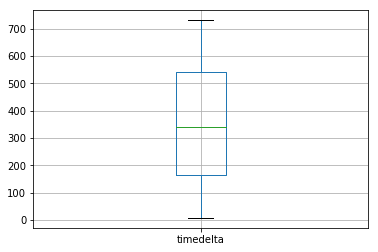

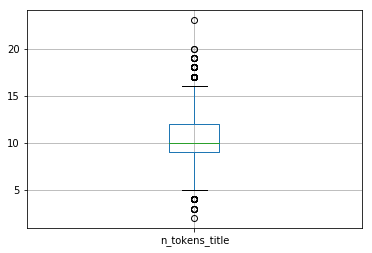

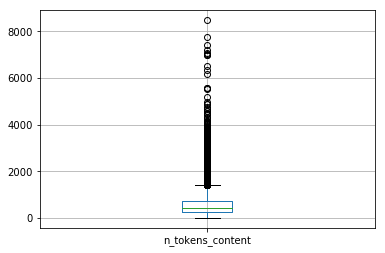

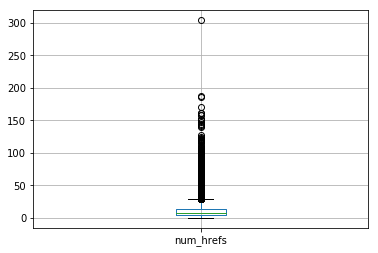

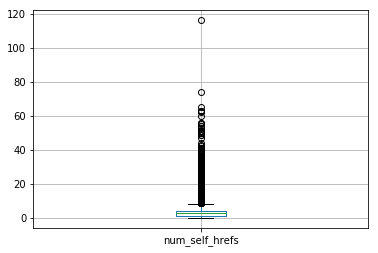

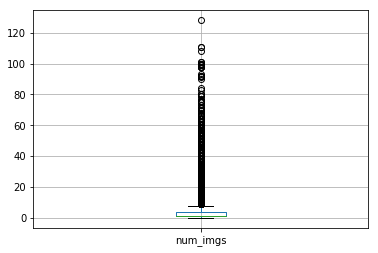

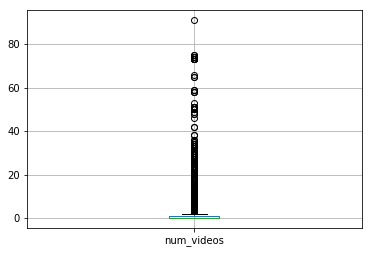

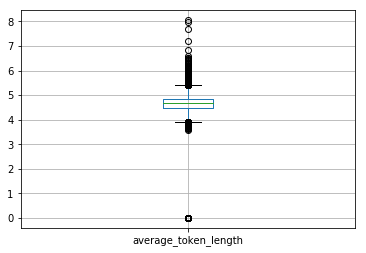

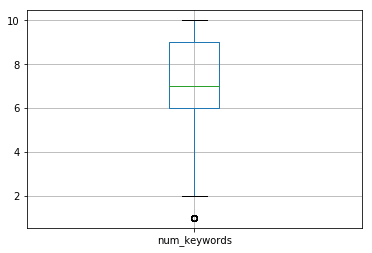

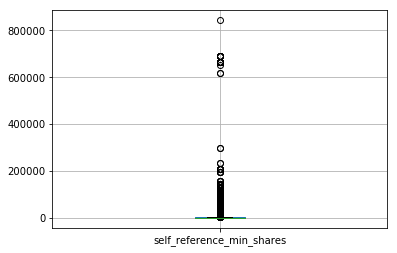

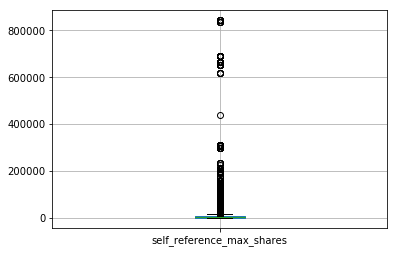

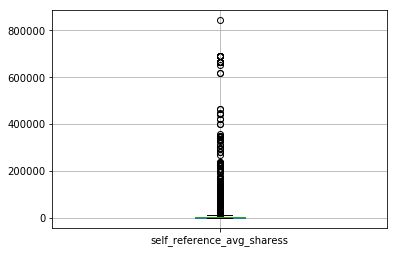

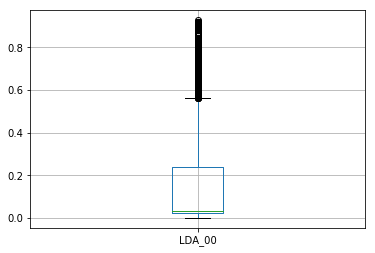

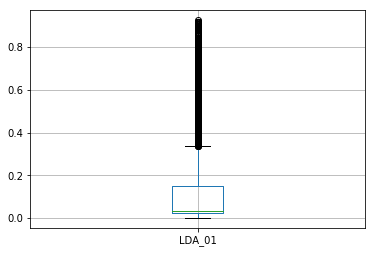

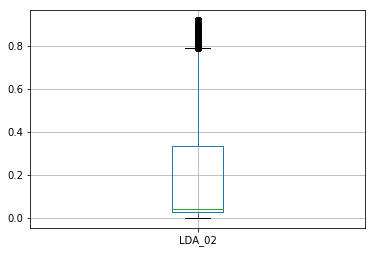

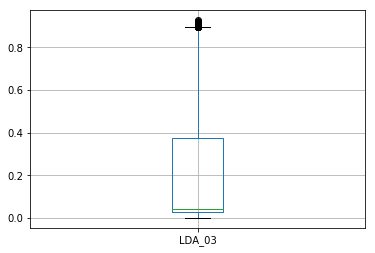

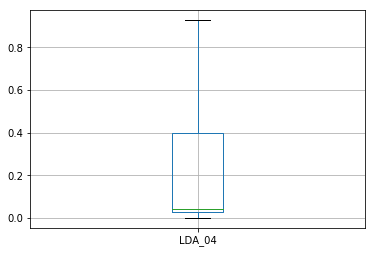

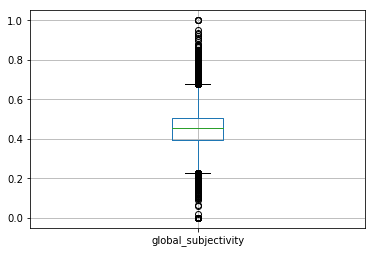

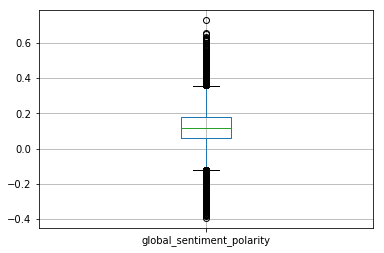

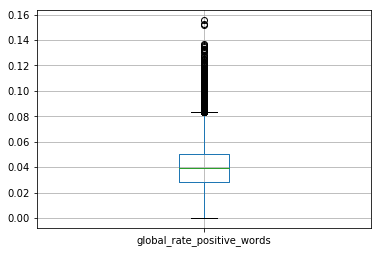

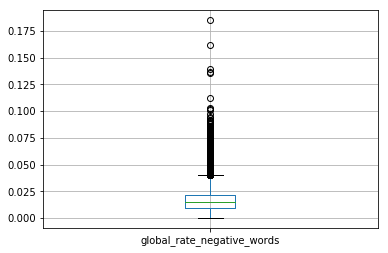

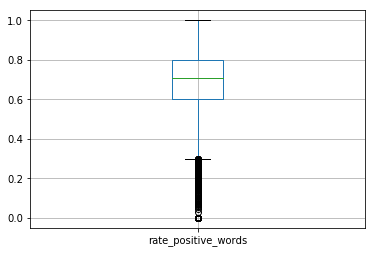

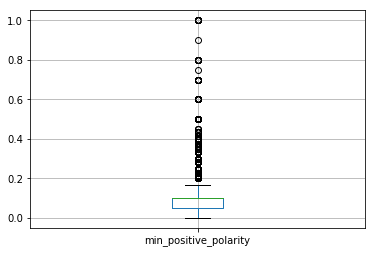

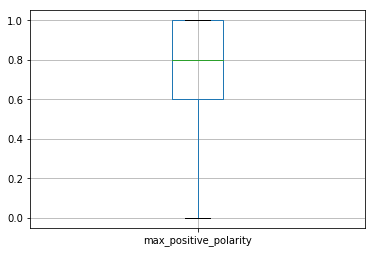

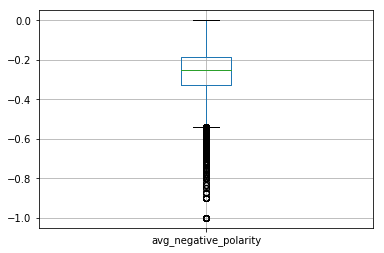

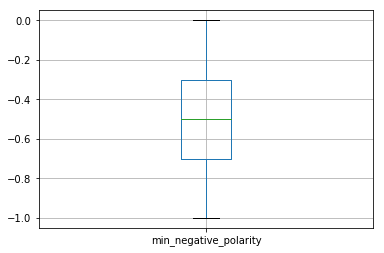

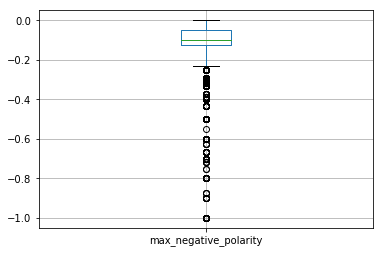

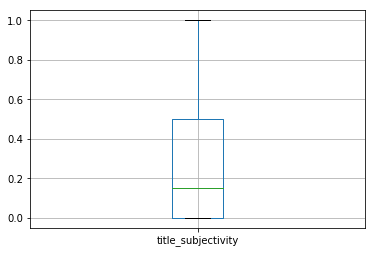

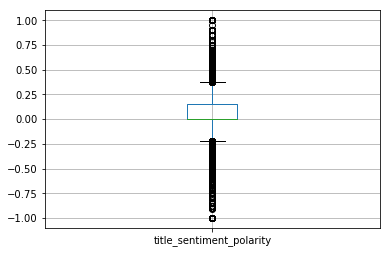

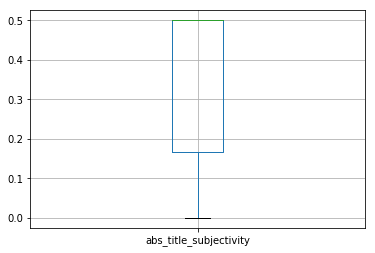

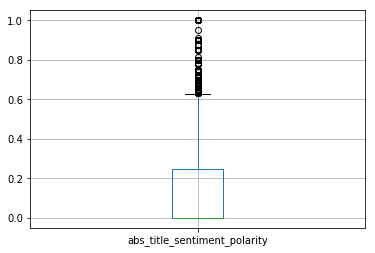

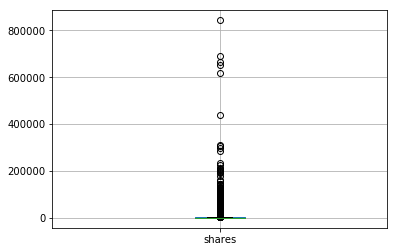

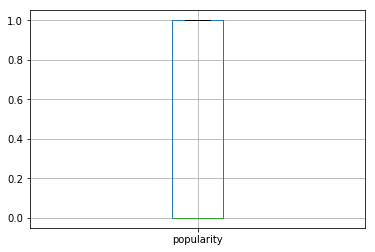

KeyError: "['publish_date'] not in index"

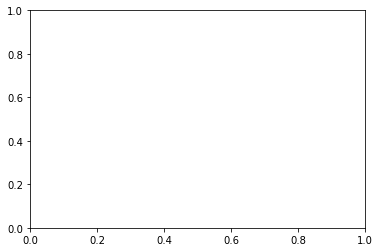

In [7]:
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore',DeprecationWarning)
%matplotlib inline

for var in required_features:
    df.boxplot(column=var)
    plt.show()

From the BoxPlots we can see there most of the variables have outliers and there is considerable skeweenes in variables like n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens, number of images and videos. 

We can perform log transform to on variables having absolute skewness >1 to address the skewness. 

In [8]:
# ---------------------------------
# Log transform variables with high skewness
# ---------------------------------

# New DataFrame with only the required variables
df_imp = df[required_features]
col_names_imp = df_imp.columns.values.tolist()

# store min value for each column
df_mins = df_imp.min()
n_cols = len(df_imp.columns)

for i_col in range(n_cols-1):
    indx = i_col + 1
    sk = df_imp.iloc[:, indx].skew()
    if(sk > 1 or sk < -1):
        new_col_name = 'ln_' + col_names_imp[indx]
        print (col_names_imp[indx], i_col, indx, sk, new_col_name)
        if df_mins[indx] > 0:
            df_imp[new_col_name] = np.log(df_imp.iloc[:, indx])
        elif df_mins[indx] == 0:
            df_tmp = df_imp.iloc[:, indx] + 1
            df_imp[new_col_name] = np.log(df_tmp)
        else:
            print('--> Log transform not completed :', col_names_imp[indx], '!!')

n_tokens_content 1 2 2.94542193879 ln_n_tokens_content
num_hrefs 2 3 4.0134948282 ln_num_hrefs
num_self_hrefs 3 4 5.17275110576 ln_num_self_hrefs
num_imgs 4 5 3.94659584465 ln_num_imgs
num_videos 5 6 7.0195327863 ln_num_videos
average_token_length 6 7 -4.5760115502 ln_average_token_length


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


self_reference_min_shares 8 9 26.2643641603 ln_self_reference_min_shares
self_reference_max_shares 9 10 13.8708490494 ln_self_reference_max_shares
self_reference_avg_sharess 10 11 17.9140933777 ln_self_reference_avg_sharess
LDA_00 11 12 1.5674632332 ln_LDA_00
LDA_01 12 13 2.08672182342 ln_LDA_01
LDA_02 13 14 1.31169490203 ln_LDA_02
LDA_03 14 15 1.23871598638 ln_LDA_03
LDA_04 15 16 1.17312947598 ln_LDA_04
global_subjectivity 16 17 -1.37268883056 ln_global_subjectivity
global_rate_negative_words 19 20 1.49191730919 ln_global_rate_negative_words
rate_positive_words 20 21 -1.423105853 ln_rate_positive_words
min_positive_polarity 21 22 3.04046773746 ln_min_positive_polarity
max_negative_polarity 25 26 -3.45974705785 ln_max_negative_polarity
--> Log transform not completed : max_negative_polarity !!
abs_title_sentiment_polarity 29 30 1.70419343991 ln_abs_title_sentiment_polarity
shares 30 31 33.9638848757 ln_shares


/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


TypeError: reduction operation 'skew' not allowed for this dtype

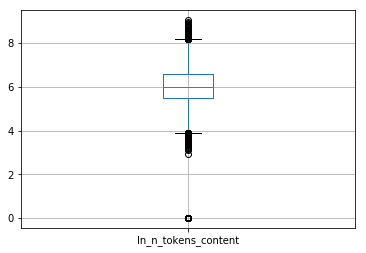

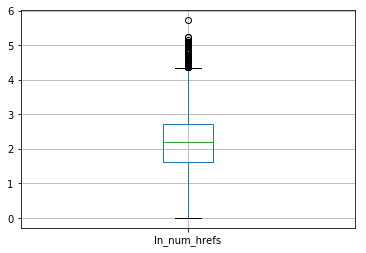

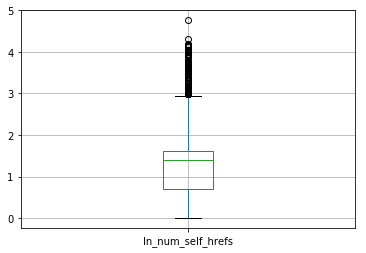

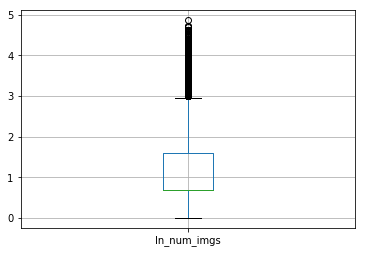

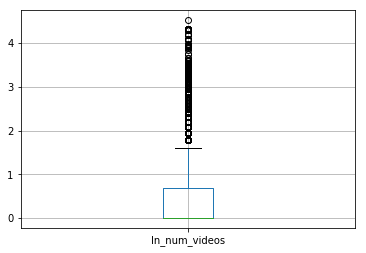

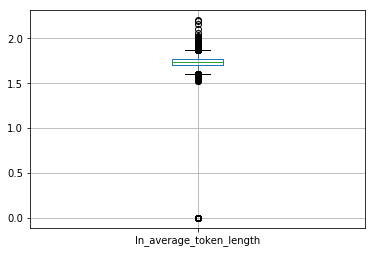

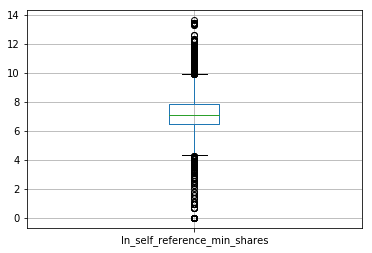

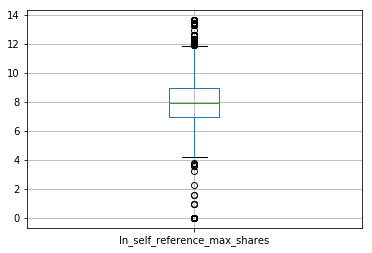

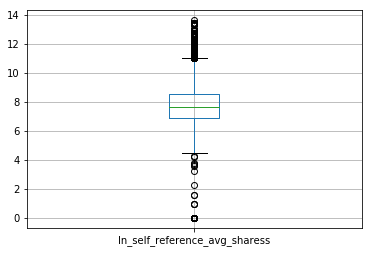

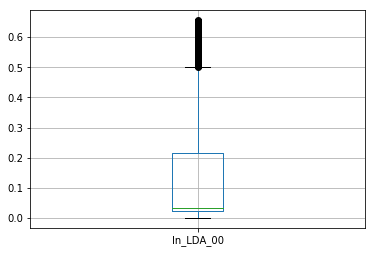

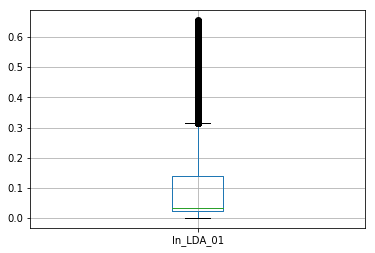

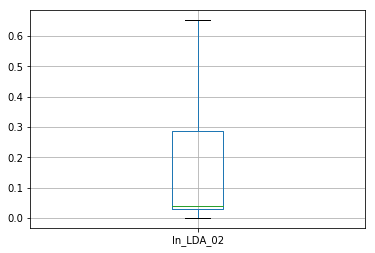

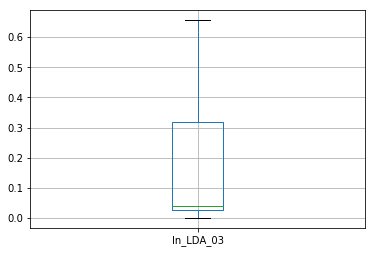

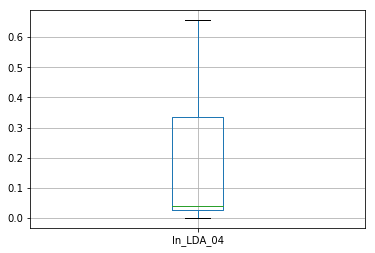

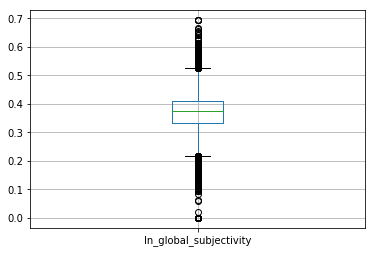

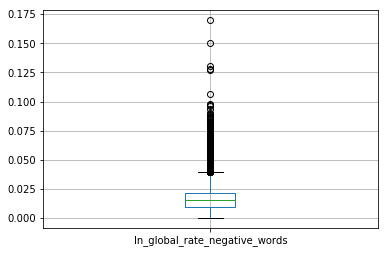

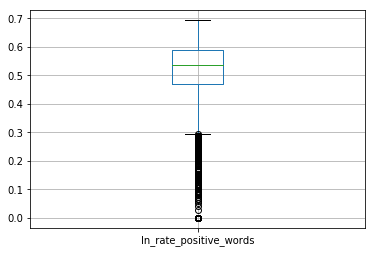

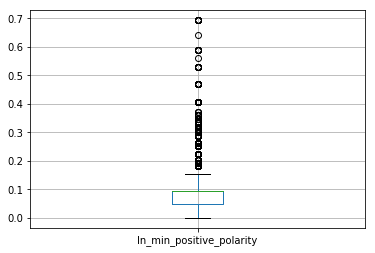

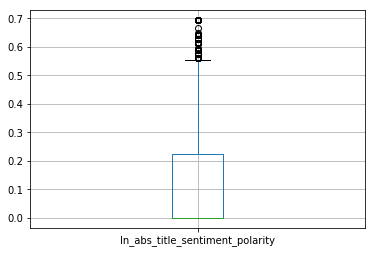

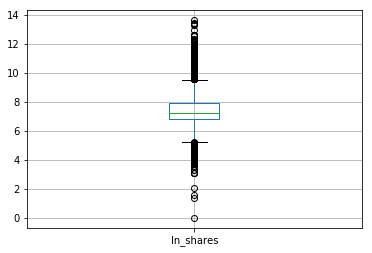

In [24]:
log_var = ['ln_n_tokens_content', 'ln_num_hrefs', 'ln_num_self_hrefs', 'ln_num_imgs',
 'ln_num_videos', 'ln_average_token_length', 'ln_self_reference_min_shares',
 'ln_self_reference_max_shares','ln_self_reference_avg_sharess',
 'ln_LDA_00', 'ln_LDA_01', 'ln_LDA_02', 'ln_LDA_03',
 'ln_LDA_04', 'ln_global_subjectivity', 'ln_global_rate_negative_words',
 'ln_rate_positive_words', 'ln_min_positive_polarity',
 'ln_abs_title_sentiment_polarity', 'ln_shares']


for var in log_var:
    df_imp.boxplot(column=var)
    plt.show()

The log variables looks normally distibuted with some outliers. 

# Simple Statistics of the Data

In [25]:
df_imp.describe().T

,count,mean,std,min,25%,50%,75%,max
timedelta,39644.0,354.530471,214.163767,8.00000,164.000000,339.000000,542.000000,731.000000
n_tokens_title,39644.0,10.398749,2.114037,2.00000,9.000000,10.000000,12.000000,23.000000
n_tokens_content,39644.0,546.514731,471.107508,0.00000,246.000000,409.000000,716.000000,8474.000000
num_hrefs,39644.0,10.883690,11.332017,0.00000,4.000000,8.000000,14.000000,304.000000
num_self_hrefs,39644.0,3.293638,3.855141,0.00000,1.000000,3.000000,4.000000,116.000000
num_imgs,39644.0,4.544143,8.309434,0.00000,1.000000,1.000000,4.000000,128.000000
num_videos,39644.0,1.249874,4.107855,0.00000,0.000000,0.000000,1.000000,91.000000
average_token_length,39644.0,4.548239,0.844406,0.00000,4.478404,4.664082,4.854839,8.041534
num_keywords,39644.0,7.223767,1.909130,1.00000,6.000000,7.000000,9.000000,10.000000
self_reference_min_shares,39644.0,3998.755396,19738.670516,0.00000,639.000000,1200.000000,2600.000000,843300.000000


In [227]:
def outliers_z_score(var):
    threshold = 3

    mean_y = np.mean(var)
    stdev_y = np.std(var)
    z_scores = [(y - mean_y) / stdev_y for y in var]
    return np.where(np.abs(z_scores) > threshold)

def replace(group, stds):
    group[np.abs(group - group.mean()) > stds * group.std()] = np.nan
    return group

